In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
%config IPCompleter.greedy=True 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
pd.options.display.max_columns = 50

height has been deprecated.



In [3]:
train_df=pd.read_csv('/home/ashwin/Downloads/train.csv')
test_df=pd.read_csv('/home/ashwin/Downloads/test.csv')
combain=[train_df,test_df]

In [4]:
train_df.head()
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test_df.head()
test_df.info()
test_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

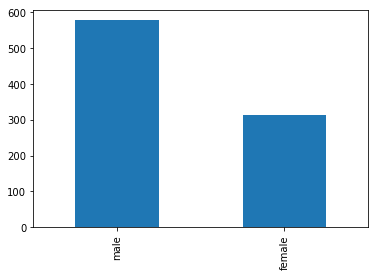

In [8]:
train_df.Sex.value_counts().plot(kind='bar')

In [9]:
train_df[train_df.Sex.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [10]:
train_df.Fare.value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
21.0000      6
27.9000      6
26.2500      6
27.7208      5
30.5000      5
73.5000      5
53.1000      5
15.2458      5
29.1250      5
34.3750      4
11.5000      4
21.0750      4
35.5000      4
12.4750      4
7.7333       4
110.8833     4
7.8792       4
227.5250     4
79.2000      4
31.3875      4
120.0000     4
27.7500      4
25.4667      4
7.5500       4
39.0000      4
263.0000     4
151.5500     4
15.8500      4
7.1250       4
13.5000      4
90.0000      4
19.2583      4
7.6500       4
23.0000      4
52.5542      3
29.7000      3
86.5000   

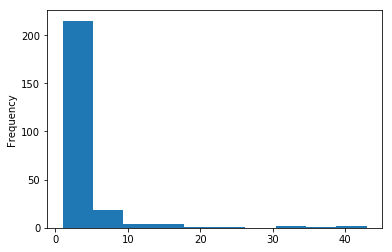

In [11]:
train_df.Fare.value_counts().plot(kind='hist')

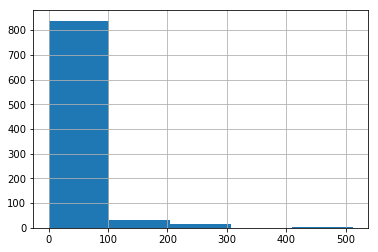

In [12]:
train_df.Fare.hist(bins=5)

In [13]:
train_df[train_df.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [14]:
train_df[train_df.Fare==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


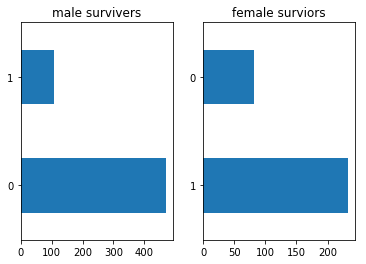

In [15]:
fig,axes=plt.subplots(1,2)
train_df[train_df.Sex=='male'].Survived.value_counts().plot(kind='barh',ax=axes[0],title="male survivers")
train_df[train_df.Sex=='female'].Survived.value_counts().plot(kind='barh',ax=axes[1],title='female surviors')

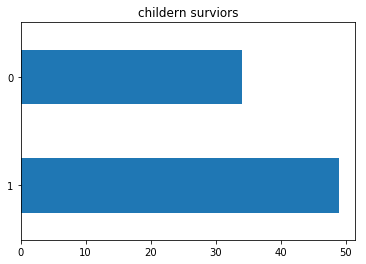

In [16]:
train_df[train_df.Age<=15].Survived.value_counts().plot(kind='barh',title='childern surviors')

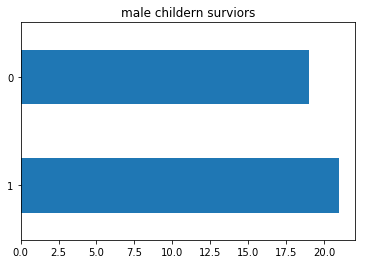

In [17]:
train_df[(train_df.Sex=='male') & (train_df.Age<=15)].Survived.value_counts().plot(kind='barh',title='male childern surviors')

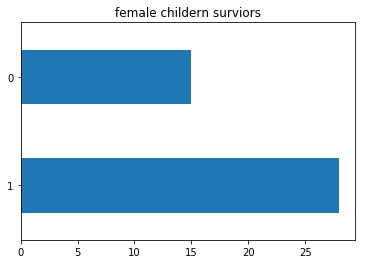

In [18]:
train_df[(train_df.Sex=='female') & (train_df.Age<=15)].Survived.value_counts().plot(kind='barh',title='female childern surviors')

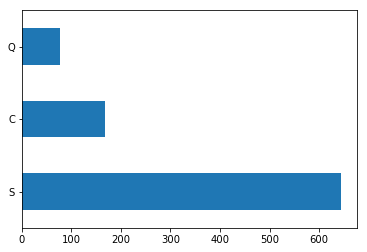

In [19]:
train_df.Embarked.value_counts().plot(kind='barh')

In [20]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [22]:
train_df[['Pclass','Survived']].groupby('Pclass',as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [23]:
train_df[['Sex','Survived']].groupby('Sex',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [24]:
train_df[['SibSp','Survived']].groupby('SibSp',as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [25]:
train_df[['Parch','Survived']].groupby('Parch',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [26]:
train_df.loc[[1,4], ['Age', 'Fare']]

,Age,Fare
1,38.0,71.2833
4,35.0,8.0500


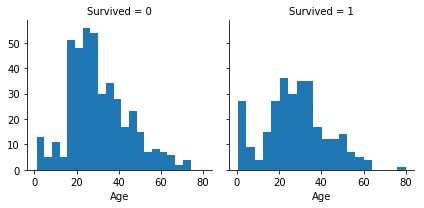

In [27]:
g=sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

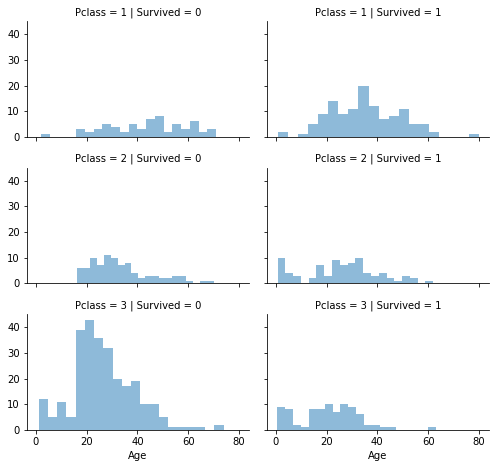

In [31]:
g=sns.FacetGrid(train_df,col='Survived',row='Pclass',size=2.2,aspect=1.6)
g.map(plt.hist,'Age',alpha=0.5,bins=20)

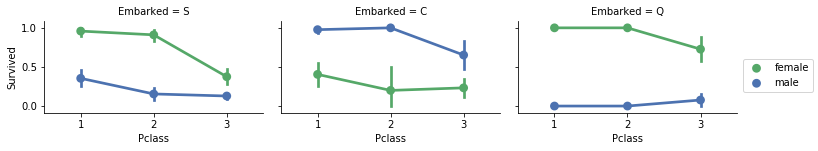

In [33]:
g=sns.FacetGrid(train_df,col='Embarked',size=2.2,aspect=1.6)
g.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
g.add_legend()

In [34]:
for dataset in combain:
    dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [35]:
for dataset in combain:
    dataset['Title']=dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Survived','Title']].groupby('Title',as_index=False).mean()\
    .sort_values(by='Survived',ascending=True)

,Title,Survived
2,Mr,0.156673
4,Rare,0.347826
0,Master,0.575000
1,Miss,0.702703
3,Mrs,0.793651


In [36]:
title_mapping={'Mr':1,'Rare':2,'Master':3,'Miss':4,'Mrs':5}
for dataset in combain:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)
    
train_df['Title'].head()

0    1
1    5
2    4
3    5
4    1
Name: Title, dtype: int64

In [37]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 11), (418, 11))

In [38]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [39]:
train_df.shape, test_df.shape

((891, 9), (418, 9))

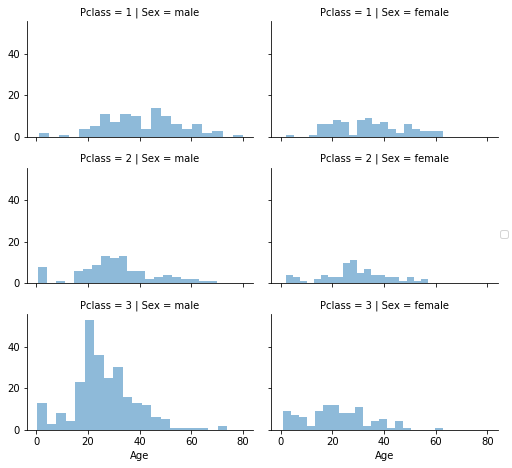

In [41]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [42]:
guess_age=np.zeros((2,3))
print guess_age

[[ 0.  0.  0.]
 [ 0.  0.  0.]]


In [43]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,5
2,1,3,1,26.0,0,0,7.9250,S,4
3,1,1,1,35.0,1,0,53.1000,S,5
4,0,3,0,35.0,0,0,8.0500,S,1


In [104]:
for dataset in combain:
    for i in range(0,2):
        for j in range(0,3):
            guss_df=dataset['Sex'==i & 'Pclass'==j+1]['Age'].dropna()
            age_guess=guss_df.median()
            guess_age[i,j]=int(age_guess/0.5+0.5)*0.5
            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex==i) 
                        & (dataset.Pclass==j+1),Age]=guess_age[i,j]
            dataset['Age']=dataset['Age'].astype(int)
            
train_df.head()

In [46]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']]\
    .groupby(['AgeBand'], as_index=False).mean()\
    .sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [ ]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

In [60]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [61]:
train_df[['Survived','FamilySize']].groupby(['FamilySize'],as_index=False)\
    .mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [68]:
for dataset in combain:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1,'IsAlone']=1

In [70]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False)\
    .mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [71]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBand,IsAlone
0,0,3,0,22.0,7.2500,S,1,"(16.336, 32.252]",0
1,1,1,1,38.0,71.2833,C,5,"(32.252, 48.168]",0
2,1,3,1,26.0,7.9250,S,4,"(16.336, 32.252]",1
3,1,1,1,35.0,53.1000,S,5,"(32.252, 48.168]",0
4,0,3,0,35.0,8.0500,S,1,"(32.252, 48.168]",1


In [75]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

In [76]:
train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,66.0,22.0,3
1,38.0,38.0,1
2,78.0,26.0,3
3,35.0,35.0,1
4,105.0,35.0,3
5,NaN,NaN,3
6,54.0,54.0,1
7,6.0,2.0,3
8,81.0,27.0,3
9,28.0,14.0,2


In [80]:
freq_data=train_df.Embarked.dropna().mode()[0]
freq_data

'S'

In [83]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].fillna(freq_data)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [84]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBand,IsAlone,Age*Class
0,0,3,0,22.0,7.2500,0,1,"(16.336, 32.252]",0,66.0
1,1,1,1,38.0,71.2833,1,5,"(32.252, 48.168]",0,38.0
2,1,3,1,26.0,7.9250,0,4,"(16.336, 32.252]",1,78.0
3,1,1,1,35.0,53.1000,0,5,"(32.252, 48.168]",0,35.0
4,0,3,0,35.0,8.0500,0,1,"(32.252, 48.168]",1,105.0


In [85]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,34.5,7.8292,2,1,1,103.5
1,893,3,1,47.0,7.0000,0,5,0,141.0
2,894,2,0,62.0,9.6875,2,1,1,124.0
3,895,3,0,27.0,8.6625,0,1,1,81.0
4,896,3,1,22.0,12.2875,0,5,0,66.0


In [86]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [87]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBand,IsAlone,Age*Class
0,0,3,0,22.0,0,0,1,"(16.336, 32.252]",0,66.0
1,1,1,1,38.0,3,1,5,"(32.252, 48.168]",0,38.0
2,1,3,1,26.0,1,0,4,"(16.336, 32.252]",1,78.0
3,1,1,1,35.0,3,0,5,"(32.252, 48.168]",0,35.0
4,0,3,0,35.0,1,0,1,"(32.252, 48.168]",1,105.0
5,0,3,0,NaN,1,2,1,NaN,1,NaN
6,0,1,0,54.0,3,0,1,"(48.168, 64.084]",1,54.0
7,0,3,0,2.0,2,0,3,"(0.34, 16.336]",0,6.0
8,1,3,1,27.0,1,0,5,"(16.336, 32.252]",0,81.0
9,1,2,1,14.0,2,1,5,"(0.34, 16.336]",0,28.0
